<a href="https://colab.research.google.com/github/mylethidiem/zero-to-hero/blob/main/tools/data_jobs_scientist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
from collections import Counter

In [3]:
data = pd.read_csv('/content/dataset_linkedin-jobs-scraper_2025-01-26_14-43-33-952_datascientist_anytime.csv')

# Inspect the first few rows
print(data.head())

                  applicationsCount   applyType  \
0                     54 applicants    EXTERNAL   
1  Be among the first 25 applicants    EXTERNAL   
2  Be among the first 25 applicants  EASY_APPLY   
3                     65 applicants    EXTERNAL   
4  Be among the first 25 applicants  EASY_APPLY   

                                            applyUrl  benefits    companyId  \
0  https://snaphyre.snaphunt.com/job/DCRM8UJVGM-V...       NaN   80814014.0   
1  https://careers.shopee.sg/job-detail/J00335271...       NaN    6451760.0   
2  https://vn.linkedin.com/jobs/view/data-scienti...       NaN    2411523.0   
3  https://www.careers-page.com/coder-trove/job/L...       NaN  100943086.0   
4  https://vn.linkedin.com/jobs/view/data-scienti...       NaN   13688376.0   

          companyName                                         companyUrl  \
0            Snaphyre  https://sg.linkedin.com/company/snaphyre?trk=p...   
1              Shopee  https://sg.linkedin.com/company/shopee?trk=

In [4]:
skills = [
    'python', 'sql', 'excel ','excel\,', 'r studio', 'power bi', 'powerbi', 'tableau', 'machine learning',
    'deep learning', 'aws', 'azure', 'gcp', 'hadoop', 'spark', 'data visualization',
    'data analytics', 'statistics', 'numpy', 'pandas', 'scikit-learn', 'nlp', 'big data',
    'java', 'scala', 'kafka', 'etl', 'domo', 'gcp', 'amazon web service', 'docker', 'rest api',
    'azkaban', 'luigi', 'airflow', 'google cloud', 'bigquery','pyspark'

    'c', 'c++', 'r', 'llm', 'nlp','langchain', 'java', 'machine learning',
    'vlm', 'luigi', 'large language models', 'ocr', 'optical character recognition',
    'cloud', 'opencv', 'computer vision', 'big data', 'math', 'statistics', 'data science',
    'deep learning', 'cloud applications', 'LLaMA', 'ocr', 'gen ai','generative ai', 'gpt',

    'google analytics', 'data warehouse', 'snowflake', 'brick', 'mysql', 'sql server', 'postgres', 'olap', 'dax', 'power platform', 'power automate', 'database'
]

In [5]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply preprocessing to job descriptions
data['clean_description'] = data['description'].apply(preprocess_text)

In [6]:
def extract_skills(text, skills_list):
    found_skills = [skill for skill in skills_list if skill in text]
    # print(found_skills)
    return found_skills

# Extract skills from each job description
data['skills'] = data['clean_description'].apply(lambda x: extract_skills(x, skills))
print(data['skills'])

0            [python, sql, java, r, java, generative ai]
1      [python, sql, machine learning, hadoop, spark,...
2      [python, aws, numpy, pandas, scala, r, data sc...
3      [python, machine learning, deep learning, scal...
4          [machine learning, r, machine learning, math]
                             ...                        
224                                                  [r]
225     [sql, aws, docker, r, cloud, postgres, database]
226                                                  [r]
227    [python, machine learning, deep learning, spar...
228                          [aws, java, r, java, cloud]
Name: skills, Length: 229, dtype: object


In [7]:
all_skills = data['skills'].sum()  # Flatten the list of lists
skill_counts = Counter(all_skills)  # Count occurrences

# Convert to a DataFrame for easier visualization
skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Frequency'])
skill_df = skill_df.sort_values(by='Frequency', ascending=False)

print(skill_df.head(50))  # Display the top 10 skills

                    Skill  Frequency
3                       r        229
2                    java        200
0                  python        153
5        machine learning        152
15                    aws         93
24                  cloud         88
16                  scala         85
1                     sql         83
17          deep learning         72
14               database         61
8              statistics         58
30                    gcp         54
11                    nlp         52
23                 docker         47
25               big data         46
13           data science         42
28                  azure         42
12                   math         35
18                    llm         32
29           google cloud         31
21         data analytics         23
32                    ocr         22
38               postgres         22
4           generative ai         22
7                   spark         20
33        computer vision         18
2

# Dedup if one job mention a skill twice or more

In [8]:
def extract_unique_skills(text, skills_list):
    text = text.replace('powerbi', 'power bi')
    found_skills = {skill for skill in skills_list if skill in text}  # Use a set for unique values
    return list(found_skills)  # Convert back to list if needed

# Extract unique skills from each job description
data['skills'] = data['clean_description'].apply(lambda x: extract_unique_skills(x, skills))

In [9]:
data

,applicationsCount,applyType,applyUrl,benefits,companyId,companyName,companyUrl,contractType,description,experienceLevel,...,postedTime,posterFullName,posterProfileUrl,publishedAt,salary,sector,title,workType,clean_description,skills
0,54 applicants,EXTERNAL,https://snaphyre.snaphunt.com/job/DCRM8UJVGM-V...,NaN,80814014.0,Snaphyre,https://sg.linkedin.com/company/snaphyre?trk=p...,Full-time,Our client is a pioneering AI data company tha...,Entry level,...,6 days ago,NaN,NaN,2025-01-20,NaN,Information Services,AI Training Engineer (Remote | Flexi-time),Engineering and Information Technology,our client is a pioneering ai data company tha...,"[generative ai, sql, java, r, python]"
1,Be among the first 25 applicants,EXTERNAL,https://careers.shopee.sg/job-detail/J00335271...,NaN,6451760.0,Shopee,https://sg.linkedin.com/company/shopee?trk=pub...,Full-time,Job Description\n\n\n * Develop and implement ...,Mid-Senior level,...,5 days ago,NaN,NaN,2025-01-20,NaN,"Internet Marketplace Platforms and Technology,...","Senior Data Scientist - Business Intelligence,...","Strategy/Planning, Analyst, and Consulting",job description\n\n\n develop and implement a...,"[numpy, nlp, sql, hadoop, spark, math, databas..."
2,Be among the first 25 applicants,EASY_APPLY,https://vn.linkedin.com/jobs/view/data-scienti...,NaN,2411523.0,SETA International,https://www.linkedin.com/company/seta-internat...,Full-time,SETA INTERNATIONAL VIETNAM - RECRUITMENT\n\nJo...,Entry level,...,6 days ago,Lily Nguyen,https://vn.linkedin.com/in/lily-nguyen-768419257,2025-01-20,NaN,IT Services and IT Consulting,Data Scientist,Engineering and Information Technology,seta international vietnam recruitment\n\njob...,"[numpy, aws, scala, database, pandas, data sci..."
3,65 applicants,EXTERNAL,https://www.careers-page.com/coder-trove/job/L...,NaN,100943086.0,Coder Trove,https://au.linkedin.com/company/coder-trove?tr...,Full-time,Coder Trove is seeking an AI Developer to join...,Not Applicable,...,6 days ago,NaN,NaN,2025-01-20,NaN,Software Development,AI Developer,Engineering and Information Technology,coder trove is seeking an ai developer to join...,"[large language models, llm, deep learning, sc..."
4,Be among the first 25 applicants,EASY_APPLY,https://vn.linkedin.com/jobs/view/data-scienti...,NaN,13688376.0,MoMo (M_Service),https://vn.linkedin.com/company/momo-mservice?...,Full-time,Key Responsibilities\n\n * Building Machine Le...,Mid-Senior level,...,3 days ago,Tran Thanh Truc,https://vn.linkedin.com/in/tran-thanh-truc-011193,2025-01-23,NaN,Software Development,Data Scientist,Engineering,key responsibilities\n\n building machine lea...,"[math, r, machine learning]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Be among the first 25 applicants,EXTERNAL,https://www.ncb-bank.vn/vi/tuyen-dung/chuyen-v...,NaN,6384104.0,National Citizen Bank (NCB),https://vn.linkedin.com/company/national-citiz...,Full-time,Mã công việc: 177 Độ tuổi: 25 - 35 Số năm kinh...,Not Applicable,...,1 month ago,NaN,NaN,2024-12-12,NaN,Banking,Chuyên viên/Chuyên viên Cấp cao/Chuyên gia Kiể...,Other,mã công việc 177 độ tuổi 25 35 số năm kinh ng...,[r]
225,27 applicants,EASY_APPLY,https://vn.linkedin.com/jobs/view/senior-softw...,NaN,19093986.0,SAPI,https://uk.linkedin.com/company/sapigroup?trk=...,Full-time,"SAPI builds, tailors, funds and manages your c...",Mid-Senior level,...,1 month ago,NaN,NaN,2024-12-18,NaN,IT Services and IT Consulting,Senior Software Engineer,Engineering,sapi builds tailors funds and manages your cus...,"[postgres, aws, sql, database, docker, r, cloud]"
226,56 applicants,EXTERNAL,https://hubble.breezy.hr/p/3d4579935484-softwa...,NaN,13184745.0,Hubble.Build,https://sg.linkedin.com/company/hubble-pte.-lt...,Full-time,What you will be doing:\n\n * Develop Hubble s...,Entry level,...,1 month ago,NaN,NaN,2024-12-18,NaN,Software Development,Software Engineer (Mobile),Engineering and Information Technology,what you will be doing\n\n develop hubble s

In [10]:
# Flatten the list of lists into a single list of skills
all_unique_skills = data['skills'].sum()

# Use Counter to count occurrences of each skill across all descriptions
skill_counts = Counter(all_unique_skills)

# Convert to DataFrame for easier visualization
skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Frequency'])
skill_df = skill_df.sort_values(by='Frequency', ascending=False)

# Display the top 10 skills
print(skill_df.head(20))

               Skill  Frequency
3                  r        229
4             python        153
2               java        100
15               aws         93
22             cloud         88
16             scala         85
1                sql         83
14  machine learning         76
10          database         61
24            docker         47
27             azure         42
12      data science         42
19     deep learning         36
9               math         35
18               llm         32
28      google cloud         31
13        statistics         29
31               gcp         27
6                nlp         26
25          big data         23


# Visualise

In [11]:
!pip install pillow

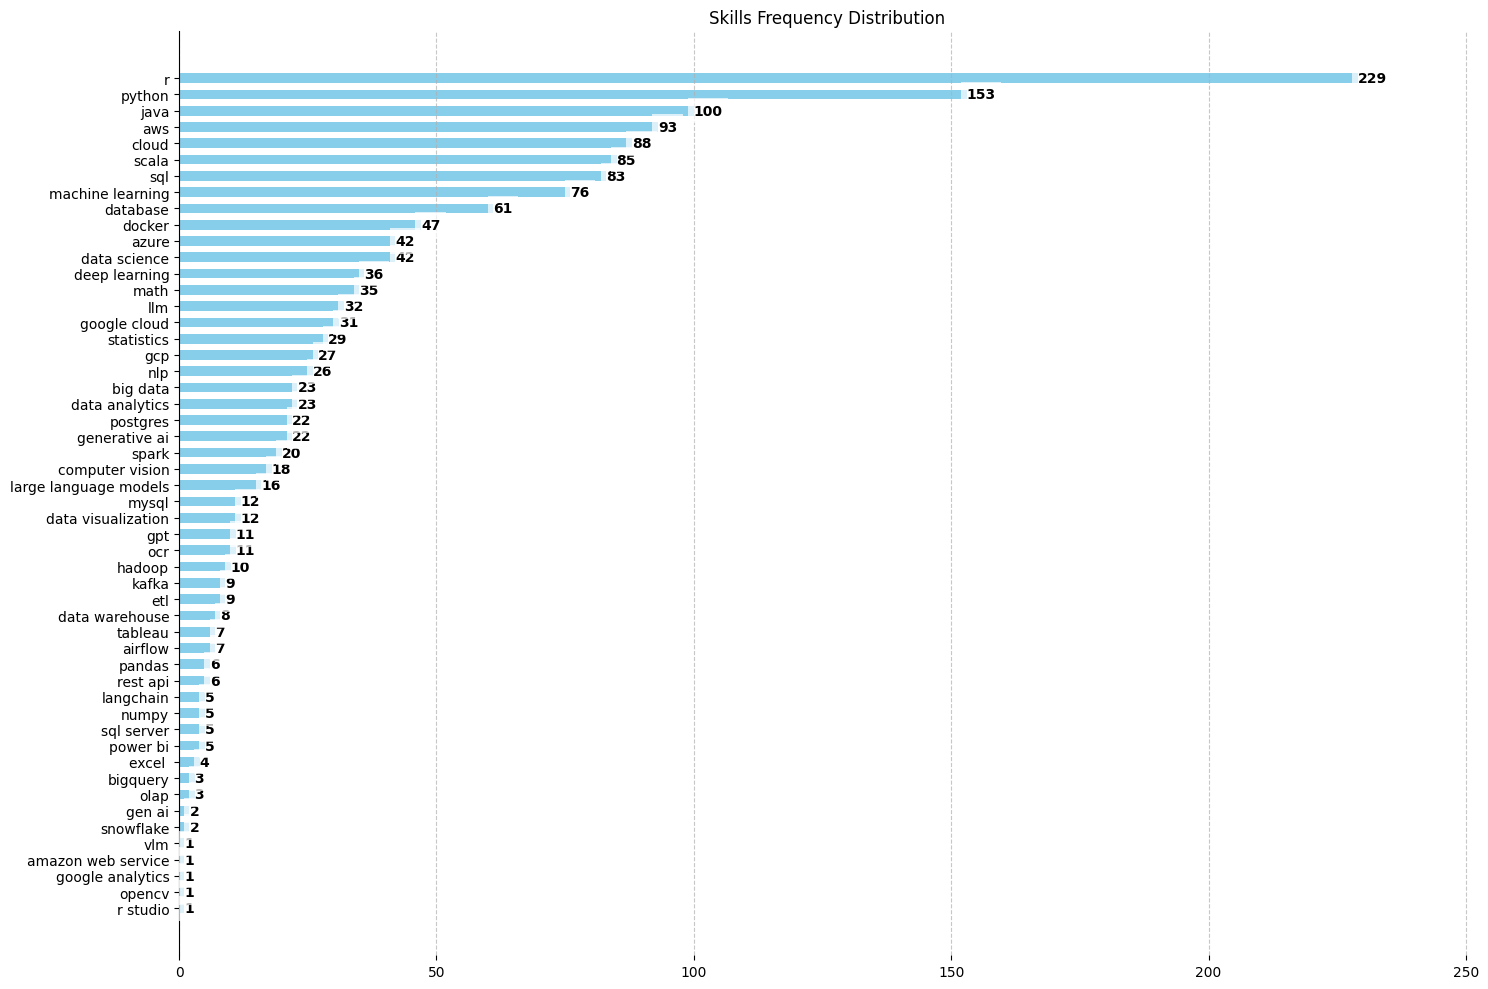

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import matplotlib.patches as patches
import os
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


# Sample data (replace this with actual counts from your code)
df = skill_df.copy()

def find_logo(skill, logos_folder='logos'):
    """Find a matching logo file for a given skill"""
    # List of common image extensions
    extensions = ['.png', '.jpg', '.jpeg', '.svg', '.gif']

    # Clean skill name (remove spaces, lowercase)
    skill = skill.lower().replace(' ', '')

    # Try to find an exact match
    for ext in extensions:
        filepath = os.path.join(logos_folder, f"{skill}{ext}")
        if os.path.exists(filepath):
            return filepath

    return None

def create_bar_chart_with_logos(df, logos_folder='logos', figsize=(15, 10)):
    # Sort DataFrame by frequency in descending order
    df = df.sort_values('Frequency', ascending=True)

    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize)

    # Create horizontal bar chart
    bars = ax.barh(np.arange(len(df)), df['Frequency'], height=0.6, color='skyblue')

    # Customize chart
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['Skill'])
    # ax.set_ylabel('')
    # ax.set_yticks([])  # This removes the x-axis ticks
    ax.spines['top'].set_visible(False)  # Hide top border
    ax.spines['right'].set_visible(False)  # Hide right border
    ax.spines['bottom'].set_visible(False)  # Hide bottom borde
    ax.set_title('Skills Frequency Distribution')

    # Add grid lines
    ax.grid(True, axis='x', linestyle='--', alpha=0.7)

    # Add value labels on the bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2,
                f'{int(width)}',
                ha='left', va='center', fontweight='bold',
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

        #No logo now
        # Try to add logo
        # skill = df.iloc[i]['Skill']
        # logo_path = find_logo(skill, logos_folder)

        # if logo_path:
        #     try:
        #         # Open and read the image
        #         img = Image.open(logo_path)

        #         # Convert to RGBA if not already
        #         if img.mode != 'RGBA':
        #             img = img.convert('RGBA')

        #         # Resize image if it's too large
        #         max_size = 40  # maximum width or height in pixels
        #         ratio = min(max_size/img.size[0], max_size/img.size[1])
        #         new_size = tuple([int(dim * ratio) for dim in img.size])
        #         img = img.resize(new_size, Image.Resampling.LANCZOS)

        #         # Create an ImageBox and add it to the plot
        #         imagebox = OffsetImage(img, zoom=0.5)  # Adjust zoom as needed
        #         ab = AnnotationBbox(imagebox, (0, i),
        #                           xybox=(-30, 0),  # Offset from y-axis
        #                           xycoords=('data', 'data'),
        #                           boxcoords="offset points",
        #                           frameon=False)
        #
        #         ax.add_artist(ab)
        #     except Exception as e:
        #         print(f"Could not load logo for {skill}: {e}")

    # Adjust layout to prevent label cutoff
    plt.margins(x=0.1)
    plt.tight_layout()

    return fig


# Create the visualization
chart = create_bar_chart_with_logos(df)

# Save or display the chart
plt.show()